# Project Business Statistics: E-news Express Project
## Kothai Niveda M


### Background: 

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

### Objective

Statistical analysis of business data. Explore the dataset and extract insights from the data. The idea is for you to get comfortable with doing statistical analysis in Python.

You are expected to perform the statistical analysis to answer the following questions:

1. Explore the dataset and extract insights using Exploratory Data Analysis.
2. Do the users spend more time on the new landing page than the old landing page?
3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than    the conversion rate for the old page?
4. Does the converted status depend on the preferred language?
5. Is the mean time spent on the new page same for the different language users?

*Consider a significance level of 0.05 for all tests.


### Data Dictionary

1. user_id - This represents the user ID of the person visiting the website.
2. group - This represents whether the user belongs to the first group (control) or the second group (treatment).
3. landing_page - This represents whether the landing page is new or old.
4. time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.
5. converted - This represents whether the user gets converted to a subscriber of the news portal or not.
6. language_preferred - This represents the language chosen by the user to view the landing page.

### Let us start by importing the required libraries

In [159]:
# import the important packages
import pandas as pd # library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing 
# library of statistical functions.

# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [160]:
# read the data
df = pd.read_csv('abtest.csv')
# returns the first 5 rows
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


#### Observations:

The DataFrame has **6** columns as mentioned in the Data Dictionary. Data in each row corresponds to various details about each user.

### Shape of the dataset 

In [161]:
df.shape

(100, 6)

#### Observations:
The dataset has **100** rows and **6** columns.

### Concise summary of the dataframe

In [162]:
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Observations:
1. All columns have **100** observations.
2. There are no missing values.
3. group, landing_page, converted and language_preferred should be categorical variables.
4. All other variables are numerical and hence are either int64 or float64.
5. Total memory usage is approximately 4.8 KB.

### Converting above mentioned features to 'category' 

In [163]:
# coverting "objects" to "category" reduces the data space required to store the dataframe
df['group'] = df.group.astype('category')
df['landing_page'] = df.landing_page.astype('category')
df['converted'] = df.converted.astype('category')
df['language_preferred'] = df.language_preferred.astype('category')

# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


#### Observations:
1. Now there are **4** categorical columns and **2** numeric columns.
2. Total memory usage has decreased now.

### Summary statistics

In [164]:
# This code will show us a summary of both numerical and non-numerical variables.
# .T gives us a transpose of the matrix for better visualization.

df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,new,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,French,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Observations:

1. user_id is just an identifier for each customer.

2. The time spent on the page ranges from **0.19** minutes to **10.71** minutes, with an average time of around **5.38** minutes and a standard deviation of **2.38** minutes. The spread seems to be even for time spent on the page. 

3. The number of users who visit the landing page and get converted is slightly greater (**54 > 46**) than those who dont. 

### 1. Exploratory Data Analysis (EDA)

### Univariate Analysis

In [165]:
# This function will give a boxplot and histogram combined along the same scale for any input numerical variable.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # We are going to have 2 rows for the subplot grid.
        sharex=True,  # this indicates x-axis will be shared among the subplots.
        gridspec_kw={"height_ratios": (0.25, 0.75)}, # the height ratio of the plots would be 1:3
        figsize=figsize,)
    
    # creating the 2 subplots
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")  # a boxplot will be plotted with 
    # a green triangle representing the mean value.
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2) # a histogram will be plotted with bins if specified in the input, 
    # else it will automatically plot it's own bins.
    
    # Adding mean and median lines for histogram
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Adding mean line.
    ax_hist2.axvline(data[feature].median(), color="red", linestyle="-")  # Adding median line.

In [166]:
# This function will give a labeled barplot for us to explore categorical variables.


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),)

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",)  # annotate the percentage

    plt.show()  # show the plot

#### user_id

In [167]:
# check unique user_id
df['user_id'].value_counts().shape

(100,)

#### Observations
There are **100** unique users. As mentioned earlier, 'user_id' is just an identifier for the users.

#### group

(2,)
control      50
treatment    50
Name: group, dtype: int64


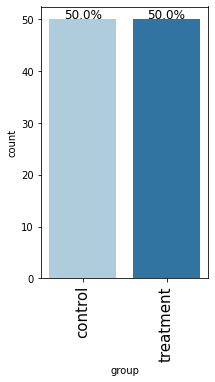

In [168]:
# check unique groups
print (df['group'].value_counts().shape)

# check the unique values
print (df['group'].value_counts())

labeled_barplot(df, 'group', perc=True)

#### Observations:
There are **2** unique groups. As mentioned in the background section, these two groups are our control and treatment groups and each group has **50** users.

#### landing_page

(2,)
new    50
old    50
Name: landing_page, dtype: int64


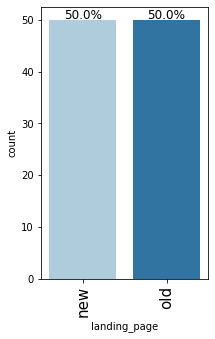

In [169]:
# check unique landing_page
print (df['landing_page'].value_counts().shape)

# check the unique values
print (df['landing_page'].value_counts())

labeled_barplot(df, 'landing_page', perc=True)

#### Observations:
There are **2** unique landing pages. As mentioned in the background section, these 2 landing pages are the old and new landing pages. **50** old landing pages are served to the control group and **50** new landing pages are served to the treatment group.

#### time spent on the page

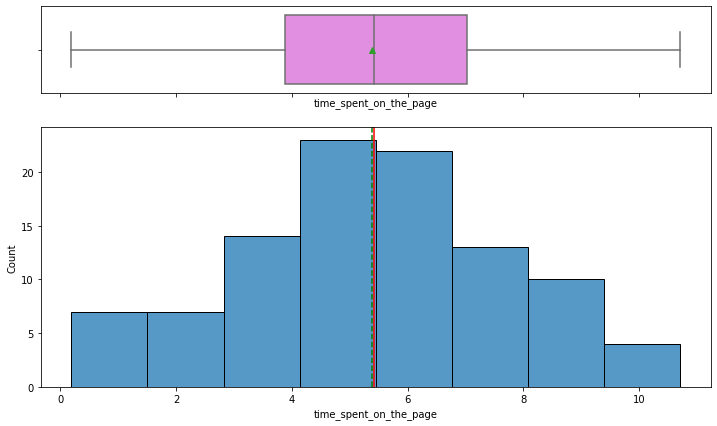

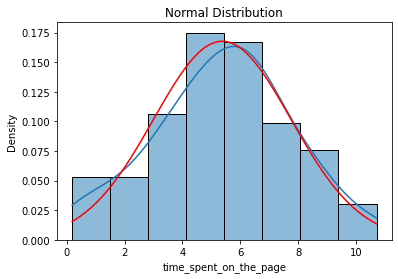

In [170]:
histogram_boxplot(df, 'time_spent_on_the_page')

# import the required function
from scipy.stats import norm

# calculate the pdf of time spent on the page using norm.pdf()
density = pd.DataFrame() # create an empty DataFrame
density["x"] = np.linspace(
    df["time_spent_on_the_page"].min(), df["time_spent_on_the_page"].max(), 100) # create an array of 100 numbers in between 
# the min and max time range and store it in the first column of the empty DataFrame
density["pdf"] = norm.pdf(density["x"], df["time_spent_on_the_page"].mean(), df["time_spent_on_the_page"].std()) # calculate 
# the pdf() of the created numbers and store it in another column named 'pdf'

fig, ax = plt.subplots() # create the subplot
sns.histplot(df["time_spent_on_the_page"], ax=ax, kde=True, stat="density") # plot the distribution of data using histogram
ax.plot(density["x"], density["pdf"], color="red") # plot the pdf of the normal distribution
plt.title("Normal Distribution") # set the title
plt.show() # display the plot

#### Observations:
1. The histogram seems to be almost symmetric around the mean. There are no outliers. The mean, median and mode are almost similar at around **5** minutes.

2. In the second plot, there are two curves red and blue. Blue curve represents the shape of data distribution and the red curve represents the PDF (Probability density function). Since both curves are quite close to each other, this data is approximately normal. Thus, we can assume this data distribution to be normal and perform our calculations based on the normality assumption.

#### converted

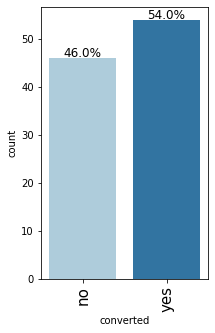

In [171]:
labeled_barplot(df, 'converted', perc=True)

#### Observations:
The distribution of 'converted' shows that the more frequent 'converted' category is 'yes' (**54%**), followed by 'no' (**46%**). However, it is only slightly higher.

#### language preferred

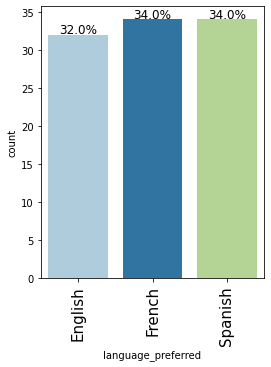

In [172]:
labeled_barplot(df, 'language_preferred', perc=True)

#### Observations:
1. All three languages are almost equally distributed. 
2. French and Spanish are slightly higher at **34%** than English which is at **32%**.

### Bivariate Analysis

#### group vs time spent on the page

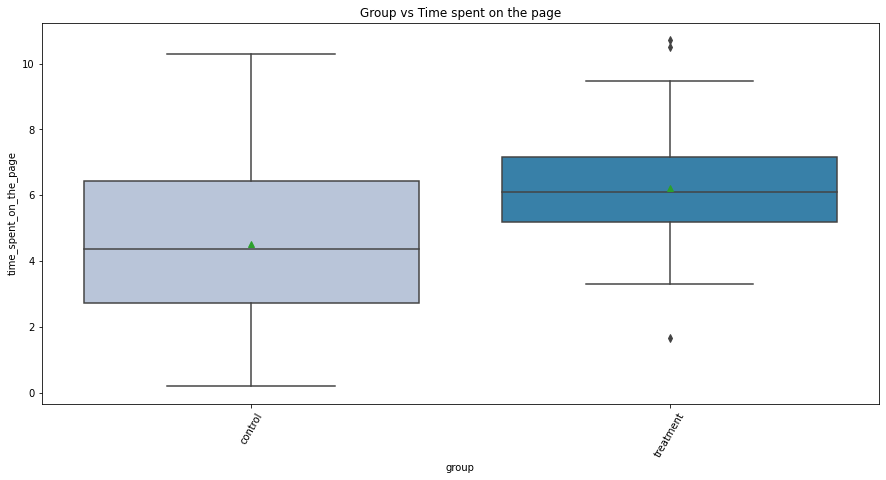

In [173]:
# Relationship between group and time spent on the page
plt.figure(figsize=(15,7))
sns.boxplot(x = "group", y = "time_spent_on_the_page", data = df, showmeans=True, palette = 'PuBu') # a boxplot will be 
# plotted with a green triangle representing the mean value.
plt.xticks(rotation = 60)
plt.title ('Group vs Time spent on the page')
plt.show()


#### Observations:
1. The control group has a wider time range than that of the treatment group.
2. Generally, the time spent on the page is higher in the treatment group. The mean time for the treatment group is around **6** minutes and for the control group it is around **4.5** minutes.
2. Outliers are present for the time spent on page for treatment group.


#### group vs converted

converted  no  yes
group             
control    29   21
treatment  17   33


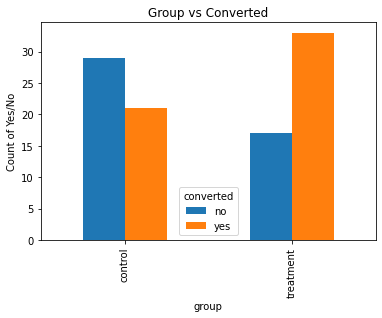

In [174]:
# Cross tabulation between group and converted
crosstab=pd.crosstab(index=df['group'],columns=df['converted'])
print(crosstab)
 
# Grouped bar chart between group and converted
crosstab.plot.bar()
plt.title('Group vs Converted')
plt.ylabel ('Count of Yes/No')
plt.show ()

#### Observations:
The conversion rate is **24%** ((33-12)/50*100) higher for the treatment group than the control group. 

#### group vs language preferred

language_preferred  English  French  Spanish
group                                       
control                  16      17       17
treatment                16      17       17


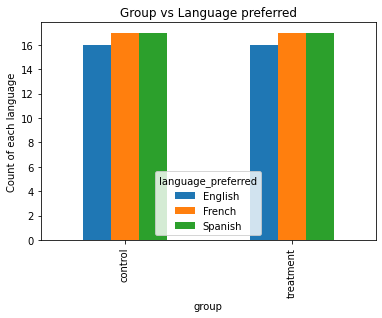

In [175]:
# Cross tabulation between group and language preferred
crosstab1=pd.crosstab(index=df['group'],columns=df['language_preferred'])
print(crosstab1)
 
# Grouped bar chart between group and language preferred
crosstab1.plot.bar()
plt.title ('Group vs Language preferred')
plt.ylabel ('Count of each language')
plt.show ()

#### Observations:
The distribution of language preferences are exactly the same for both control and treatment groups, English - **16**, French - **17**, Spanish - **17**.

#### time spent on the page vs converted

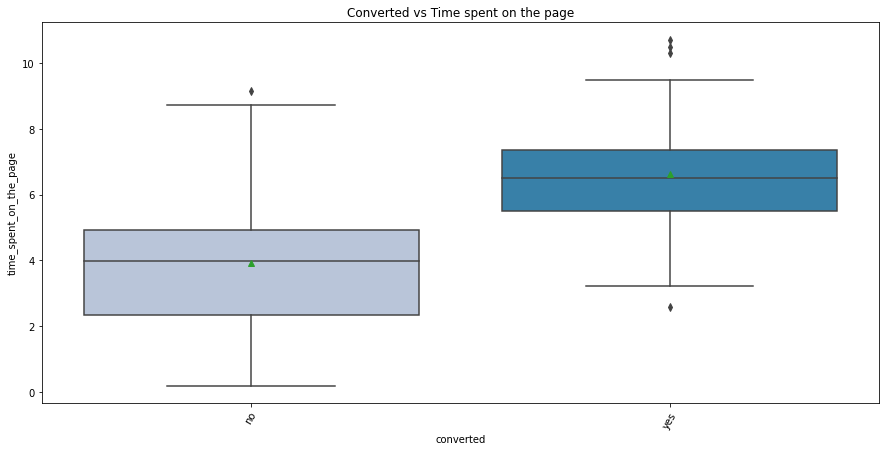

In [176]:
# Relationship between time spent on the page and converted
plt.figure(figsize=(15,7))
sns.boxplot(x = "converted", y = "time_spent_on_the_page", data = df, showmeans=True, palette = 'PuBu') # a boxplot will be 
# plotted with a green triangle representing the mean value.
plt.xticks(rotation = 60)
plt.title ('Converted vs Time spent on the page')
plt.show()

#### Observations:
1. A greater time spent on the page leads to more chances of conversion.
2. There are outliers for time spent on the page for both 'yes' and 'no' categories of converted.

#### time spent on the page vs language preferred

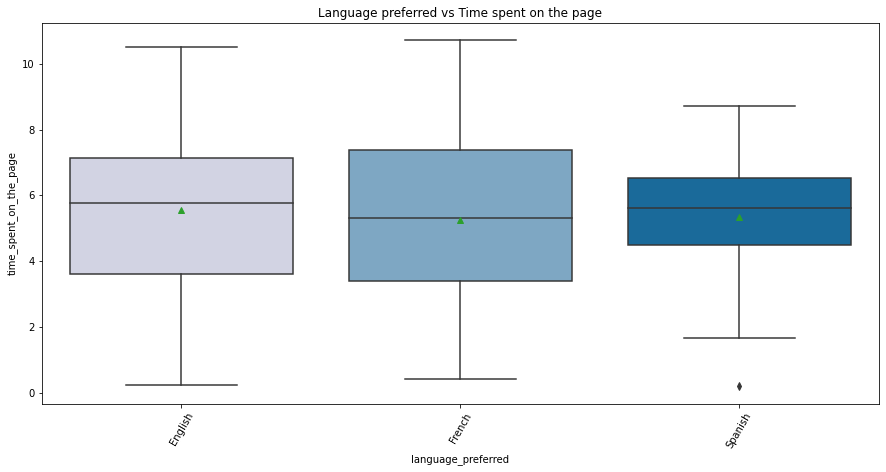

In [177]:
# Relationship between time spent on the page and language preferred
plt.figure(figsize=(15,7))
sns.boxplot(x = "language_preferred", y = "time_spent_on_the_page", data = df, showmeans=True, palette = 'PuBu') # a boxplot 
# will be plotted with a green triangle representing the mean value.
plt.xticks(rotation = 60)
plt.title ('Language preferred vs Time spent on the page')
plt.show ()

#### Observations:
1. English and French have almost similar time ranges. This indicates that the quartile time for both these languages are quite similar.
2. Spanish has a smaller range as compared to the other two languages, though its mean and median are similar to the other two languages, which is about **6** minutes. 
3. There is an outlier for time spent on the page for Spanish language.

#### converted vs language preferred

converted           no  yes
language_preferred         
English             11   21
French              19   15
Spanish             16   18


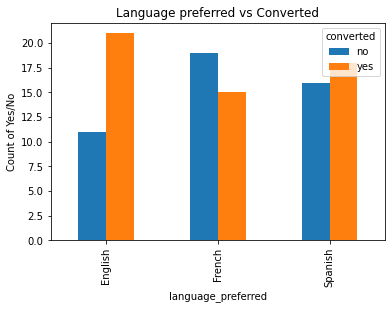

In [178]:
# Cross tabulation between converted and language preferred
crosstab2=pd.crosstab(index=df['language_preferred'],columns=df['converted'])
print(crosstab2)
 
# Grouped bar chart between converted and language preferred
crosstab2.plot.bar()
plt.title ('Language preferred vs Converted')
plt.ylabel ('Count of Yes/No')
plt.show ()

#### Observations:

The English language has the highest conversion rate of **65%** ((21/32)*100), followed by Spanish - 52.9% ((18/34)*100) and French - 44% ((15/34)*100)


#### Insights from EDA:

1. A greater time spent on the page leads to more chances of conversion. Users spend more time on the new landing page (mean of around **6** minutes in new landing page vs mean of around **4.5** minutes in old landing page). 
2. We do see that the new landing page does increase the number of conversions. The conversion rate is **24%** higher for the treatment group than the control group. Hence the new landing page seems to be more effective to gather new subscribers. 
3. The conversion rate is the highest for English language at **65%** followed by Spanish (**52.9%**) and then French (**44%**). 
4. The mean time spent on the page for the different languages are similar at about **6** minutes.

Let's validate all these statements in hypothesis testing.

### 2. Do the users spend more time on the new landing page than the old landing page?

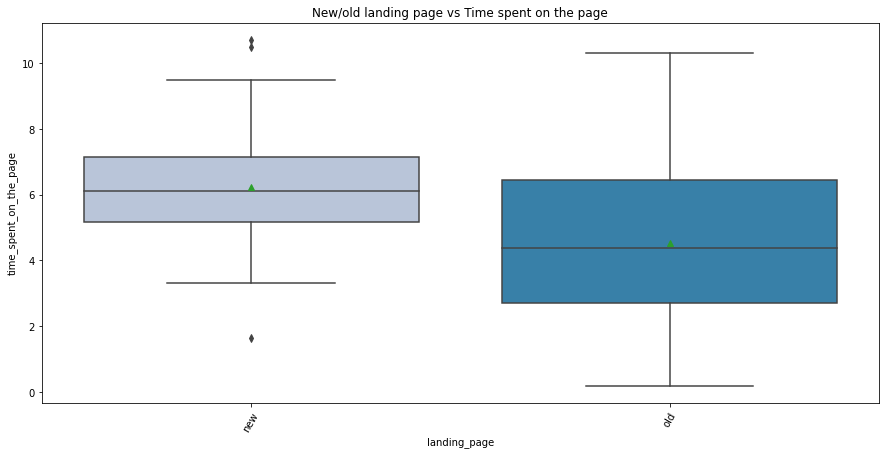

In [179]:
# Relationship between new/old landing page and time spent on the page
plt.figure(figsize=(15,7))
sns.boxplot(x = "landing_page", y = "time_spent_on_the_page", data = df, showmeans=True, palette = 'PuBu') # a boxplot will 
# be plotted with a green triangle representing the mean value.
plt.xticks(rotation = 60)
plt.title ('New/old landing page vs Time spent on the page')
plt.show()

#### Observations:
1. The old landing page has a wider time range than that of the new landing page.
2. Generally, the time spent on the page is higher for the new landing page. The mean time for the new landing page is around **6** minutes and for the old landing page it is around **4.5** minutes.
2. Outliers are present for the time spent on page for the new landing page.

### Step 1: Define null and alternative hypothesis


Let $\mu_1, \mu_2$ be the mean time spent on the 
**old landing page** by the control group and 
**new landing page** by the treatment group respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1<\mu_2$

In [180]:
# Let's create two new dataframes - one for control group and one for treatment group
dfcontrol=df.copy()
dfcontrol.drop(dfcontrol[dfcontrol['group'] == 'treatment'].index, inplace = True)

dftreatment=df.copy()
dftreatment.drop(dftreatment[dftreatment['group'] == 'control'].index, inplace = True)

# find the sample standard deviations for the two samples
print('The standard deviation of the time spent by users on old landing page is ' + str(round(dfcontrol
                                                                                    ['time_spent_on_the_page'].std(), 2)))
print('The standard deviation of the time spent by users on new landing page is ' + str(round(dftreatment
                                                                                    ['time_spent_on_the_page'].std(), 2)))

The standard deviation of the time spent by users on old landing page is 2.58
The standard deviation of the time spent by users on new landing page is 1.82


### Step 2: Select the appropriate test

This is a two samples problem where they are both independent and we are comparing the means with unkown variances. Hence we will use a **Two Independent Sample T-test** and this is a case of a one-tailed test.

#### Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, the time spent on the landing page is measured on a continuous scale.
* Normally distributed populations - Yes, we have seen earlier from our EDA that time spent on landing page almost follows a normal distribution and hence we can assume it to be normal.
* Independent populations - Yes, we are informed that the sample observations are independent of each other.
* Unequal population standard deviations - As the sample standard deviations are different (2.58 and 1.82), the population standard deviations may be assumed to be different.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

We can use two sample T-test for this problem.


### Step 3: Define the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data 

Let's create two new dataframes - one for control group and one for treatment group

In [181]:
dfcontrol=df.copy()
dfcontrol.drop(dfcontrol[dfcontrol['group'] == 'treatment'].index, inplace = True)

In [182]:
dftreatment=df.copy()
dftreatment.drop(dftreatment[dftreatment['group'] == 'control'].index, inplace = True)

### Step 5: Calculate the p-value

In [183]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(dfcontrol['time_spent_on_the_page'], dftreatment['time_spent_on_the_page'], 
                               equal_var = False, alternative = 'less')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with α

As the p-value (~0.0001) is less than the level of significance, we reject the null hypothesis.

### Step 7: Draw inference

Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we do have enough evidence to support the claim that users spend more time on the new landing page than the old landing page.

### 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

converted     no  yes
landing_page         
new           17   33
old           29   21


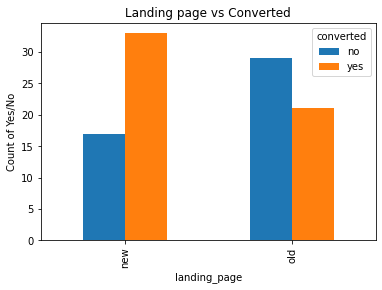

In [184]:
# Cross tabulation between landing page and converted
crosstab3=pd.crosstab(index=df['landing_page'],columns=df['converted'])
print (crosstab3)

# Grouped bar chart between landing page and converted
crosstab3.plot.bar()
plt.title('Landing page vs Converted')
plt.ylabel ('Count of Yes/No')
plt.show ()

#### Observations:
The conversion rate is **24%** ((33-12)/50*100) higher for the new landing page than the old landing page. 

### Step 1: Define null and alternative hypothesis
Let $p_1,p_2$ be the proportions of users who visit the landing page and get converted for the **old landing page**  and **new landing page** respectively.

We will test the null hypothesis

>$H_0:p_1 =p_2$

against the alternate hypothesis

>$H_a:p_1 < p_2$

### Step 2: Select the appropriate test

This is a one tailed test concerning two population portions of conversion rates.Hence we will use a **Two Proportion Z-test** for this problem.

#### Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, a user either gets converted or not..
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution be approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_1 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-21}{50} =29 \geq 10 \\
np_2 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-33}{50} =17 \geq 10 $


### Step 3: Define the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

Let's find the number of people who got converted for each landing page

In [185]:
# Cross tabulation between landing_page and converted
crosstab3=pd.crosstab(index=df['landing_page'],columns=df['converted'])
print(crosstab3)
 

converted     no  yes
landing_page         
new           17   33
old           29   21


### Step 5: Calculate the p-value

In [186]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of converted users
conversion_count = np.array([21, 33])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(conversion_count, nobs, alternative = 'smaller')
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with α

As the p-value (~0.0080) is less than the level of significance, we reject the null hypothesis.

### Step 7: Draw inference

Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we do have enough evidence to support the claim that the conversion rate (the proportion of users who visit the landing page and get converted) for the new page is greater than the conversion rate for the old page.

### 4. Does the converted status depend on the preferred language? 

converted           no  yes
language_preferred         
English             11   21
French              19   15
Spanish             16   18


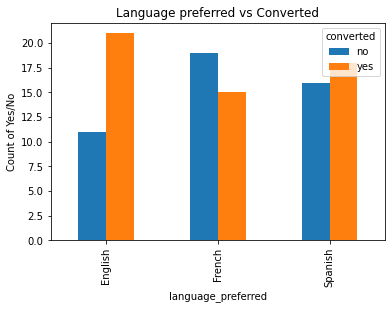

In [187]:
# Cross tabulation between converted and language preferred
crosstab4=pd.crosstab(index=df['language_preferred'],columns=df['converted'])
print(crosstab4)
 
# Grouped bar chart between converted and language preferred
crosstab4.plot.bar()
plt.title ('Language preferred vs Converted')
plt.ylabel ('Count of Yes/No')
plt.show ()

#### Observations:
The English language has the highest conversion rate of **65%** ((21/32)*100), followed by Spanish - 52.9% ((18/34)*100) and French - 44% ((15/34)*100)

### Step 1: Define null and alternative hypothesis


We will test the null hypothesis

>$H_0:$ converted status is independent of preferred language.

against the alternate hypothesis

>$H_a:$ converted status depends on preferred language.

### Step 2:  Select the appropriate test

Here we are interested to know whether the two discrete variables are independent and hence we could use the **Chi-Square test for Independence**.

#### Let's test whether the assumptions are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [188]:
#preparing the contingency table
crosstab4=pd.crosstab(index=df['language_preferred'],columns=df['converted'])

### Step 5: Calculate the p-value

In [189]:
#import the required functions
from scipy.stats import chi2_contingency

chi, p_value, dof, expected = chi2_contingency(crosstab4)
print('The p-value is ', p_value)

The p-value is  0.2129888748754345


### Step 6: Compare the p-value with α

As the p-value (~0.2130) is greater than the level of significance, we fail to reject the null hypothesis.

### Step 7: Draw inference

### Insight
Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis.  Hence, we do not have enough statistical significance to conclude that the converted status depends on the preferred language.

### 5. Is the mean time spent on the new page same for the different language users?

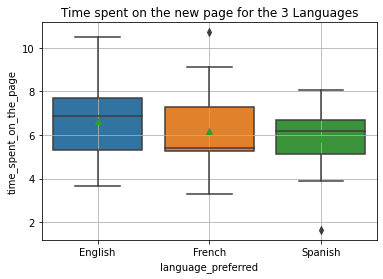

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


In [190]:
# visual analysis of the time spent on the new page for the three language users
sns.boxplot(x=dftreatment["language_preferred"], y=dftreatment["time_spent_on_the_page"], data = dftreatment, showmeans=True)
plt.grid()
plt.title ('Time spent on the new page for the 3 Languages')
plt.show ()

# mean of time spent on the new page for different language users
print (dftreatment.groupby("language_preferred")["time_spent_on_the_page"].mean())



#### Observations:
The distribution of the time spent for the different languages have different ranges, but their interquartile ranges are mostly within **5** to **8** minutes and their mean time spent on the page is around **6** minutes.

### Step 1: Define null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means of time spent on the new page for **English**, **French** and **Spanish** language users
respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one mean time spent is different from the rest.

### Step 2: Select the appropriate test

This is a problem, concerning three population means. **One-way ANOVA** could be the appropriate test here provided normality and equality of variance assumptions are verified.

For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

For equality of variance, Levene test is applied to the response variable.

#### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ The mean time spent on the new page follows a normal distribution against the alternative hypothesis

>$H_a:$ The mean time spent on the new page does not follow a normal distribution

In [191]:
# Assumption 1: Normality
# Use the shapiro function for the scipy.stats library for this test

# find the p-value
w, p_value = stats.shapiro(dftreatment['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very much larger than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution.

#### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [192]:
#Assumption 2: Homogeneity of Variance
# use levene function from scipy.stats library for this test

# find the p-value
statistic, p_value = stats.levene(dftreatment[dftreatment['language_preferred']=='English']['time_spent_on_the_page'],
                            dftreatment[dftreatment['language_preferred']=='French']['time_spent_on_the_page'],
                            dftreatment[dftreatment['language_preferred']=='Spanish']['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is larger than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [193]:
# separate the time spent on the new page with respect to the three language preferences
timespent_English = dftreatment[dftreatment['language_preferred']=='English']['time_spent_on_the_page']
timespent_French = dftreatment[dftreatment['language_preferred']=='French']['time_spent_on_the_page']
timespent_Spanish = dftreatment[dftreatment['language_preferred']=='Spanish']['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [194]:
# perform one-way anova test using the f_oneway function from scipy.stats library
test_stat, p_value = stats.f_oneway(timespent_English, timespent_French, timespent_Spanish)
print('The p-value is ', p_value)

The p-value is  0.43204138694325955


### Step 6: Compare the p-value with α

As the p-value (~0.4320) is greater than the level of significance, we fail to reject the null hypothesis.

### Step 7: Draw inference

As the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that the mean time spent on the new page is different for the different language users.

### Insights after Hypothesis Testing

Therefore, we do have enough statistical evidence to conclude that:

1. The users spend more time on the new landing page than the old landing page.
2. The conversion rate (the proportion of users who visit the landing page and get converted) for the new page is greater than the conversion rate for the old page.
3. The converted status is independent of the preferred language.
4. The mean time spent on the new page is the same for the different language users.

Hence, the new landing page is more effective to gather new subscribers and so E-news Express can go ahead and implement this new landing page.
